In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import numpy as np
from sklearn.preprocessing import StandardScaler
%matplotlib inline
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation
from scipy.cluster import hierarchy
from scipy.spatial import distance_matrix
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.manifold import TSNE

# Load data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
main_dir = "drive/MyDrive/dataset/merged/"

In [ ]:
df = pd.read_csv(main_dir + 'final_data (1).csv')
df

In [ ]:
df.info()

In [ ]:
df.isna().sum()

# Agglomerative Clustering

## Silhouette Coefficients

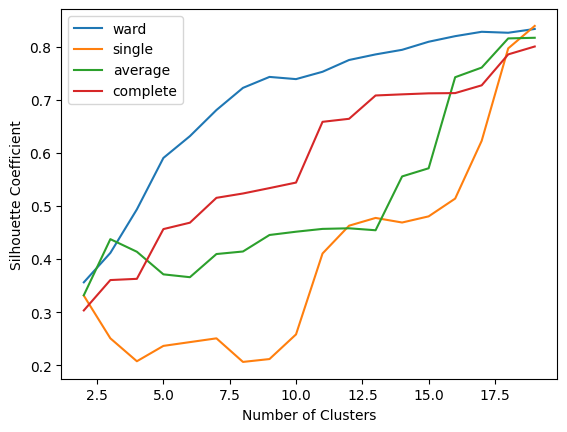

In [ ]:
# Define the columns that need to be scaled and encoded
num_cols = ['total_guest_capacity',	'bedroom',	'bathroom',	'beds',	'price_per_day',	'area_distance_to_airport']
cat_cols = ['property_type','area_regency_city']

# Create the transformers
scaler = MinMaxScaler()
encoder = OneHotEncoder(drop='first')

# Create the column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', scaler, num_cols),
        ('cat', encoder, cat_cols)
    ])

# Create a list to store the Silhouette Coefficients for each linkage method
silhouette_scores_ward = []
silhouette_scores_single = []
silhouette_scores_average = []
silhouette_scores_complete = []

# Loop through different numbers of clusters
for n_clusters in range(2, 20):
    # Create pipelines
    pipeline_ward = Pipeline([
        ('preprocessor', preprocessor),
        ('clustering', AgglomerativeClustering(n_clusters=n_clusters, linkage='ward'))
    ])
    pipeline_single = Pipeline([
        ('preprocessor', preprocessor),
        ('clustering', AgglomerativeClustering(n_clusters=n_clusters, linkage='single'))
    ])
    pipeline_average = Pipeline([
        ('preprocessor', preprocessor),
        ('clustering', AgglomerativeClustering(n_clusters=n_clusters, linkage='average'))
    ])
    pipeline_complete = Pipeline([
        ('preprocessor', preprocessor),
        ('clustering', AgglomerativeClustering(n_clusters=n_clusters, linkage='complete'))
    ])

    # Fit
    pipeline_ward.fit(df)
    labels_ward = pipeline_ward.named_steps['clustering'].labels_
    silhouette_avg_ward = silhouette_score(pipeline_ward.named_steps['preprocessor'].transform(df), labels_ward)
    silhouette_scores_ward.append(silhouette_avg_ward)

    pipeline_single.fit(df)
    labels_single = pipeline_single.named_steps['clustering'].labels_
    silhouette_avg_single = silhouette_score(pipeline_single.named_steps['preprocessor'].transform(df), labels_single)
    silhouette_scores_single.append(silhouette_avg_single)

    pipeline_average.fit(df)
    labels_average = pipeline_average.named_steps['clustering'].labels_
    silhouette_avg_average = silhouette_score(pipeline_average.named_steps['preprocessor'].transform(df), labels_average)
    silhouette_scores_average.append(silhouette_avg_average)

    pipeline_complete.fit(df)
    labels_complete = pipeline_complete.named_steps['clustering'].labels_
    silhouette_avg_complete = silhouette_score(pipeline_complete.named_steps['preprocessor'].transform(df), labels_complete)
    silhouette_scores_complete.append(silhouette_avg_complete)

# Plot Silhouette
plt.plot(range(2, 20), silhouette_scores_ward, label='ward')
plt.plot(range(2, 20), silhouette_scores_single, label='single')
plt.plot(range(2, 20), silhouette_scores_average, label='average')
plt.plot(range(2, 20), silhouette_scores_complete, label='complete')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Coefficient')
plt.legend()
plt.show()


## Davies-Bouldin Index

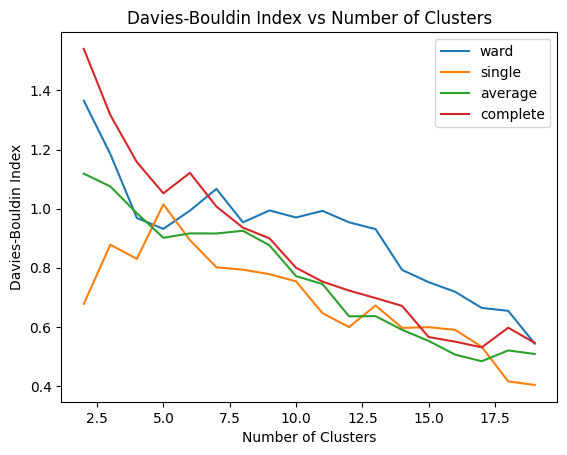

In [ ]:
# Create lists to store the Davies-Bouldin Index scores for each linkage method
dbi_scores_ward = []
dbi_scores_single = []
dbi_scores_average = []
dbi_scores_complete = []

# Loop through different numbers of clusters
for n_clusters in range(2, 20):
    # Create pipelines
    pipeline_ward = Pipeline([
        ('preprocessor', preprocessor),
        ('clustering', AgglomerativeClustering(n_clusters=n_clusters, linkage='ward'))
    ])
    pipeline_single = Pipeline([
        ('preprocessor', preprocessor),
        ('clustering', AgglomerativeClustering(n_clusters=n_clusters, linkage='single'))
    ])
    pipeline_average = Pipeline([
        ('preprocessor', preprocessor),
        ('clustering', AgglomerativeClustering(n_clusters=n_clusters, linkage='average'))
    ])
    pipeline_complete = Pipeline([
        ('preprocessor', preprocessor),
        ('clustering', AgglomerativeClustering(n_clusters=n_clusters, linkage='complete'))
    ])

    # Fit
    pipeline_ward.fit(df)
    labels_ward = pipeline_ward.named_steps['clustering'].labels_
    dbi_score_ward = davies_bouldin_score(pipeline_ward.named_steps['preprocessor'].transform(df), labels_ward)
    dbi_scores_ward.append(dbi_score_ward)

    pipeline_single.fit(df)
    labels_single = pipeline_single.named_steps['clustering'].labels_
    dbi_score_single = davies_bouldin_score(pipeline_single.named_steps['preprocessor'].transform(df), labels_single)
    dbi_scores_single.append(dbi_score_single)

    pipeline_average.fit(df)
    labels_average = pipeline_average.named_steps['clustering'].labels_
    dbi_score_average = davies_bouldin_score(pipeline_average.named_steps['preprocessor'].transform(df), labels_average)
    dbi_scores_average.append(dbi_score_average)

    pipeline_complete.fit(df)
    labels_complete = pipeline_complete.named_steps['clustering'].labels_
    dbi_score_complete = davies_bouldin_score(pipeline_complete.named_steps['preprocessor'].transform(df), labels_complete)
    dbi_scores_complete.append(dbi_score_complete)

# Plot Davies-Bouldin Index scores
plt.plot(range(2, 20), dbi_scores_ward, label='ward')
plt.plot(range(2, 20), dbi_scores_single, label='single')
plt.plot(range(2, 20), dbi_scores_average, label='average')
plt.plot(range(2, 20), dbi_scores_complete, label='complete')
plt.xlabel('Number of Clusters')
plt.ylabel('Davies-Bouldin Index')
plt.title('Davies-Bouldin Index vs Number of Clusters')
plt.legend()
plt.show()


## Dendrogram

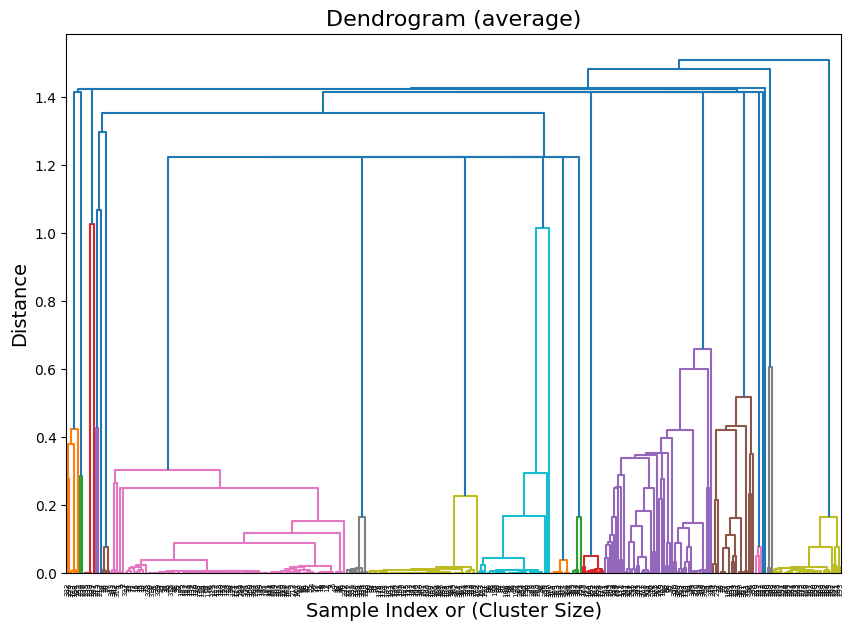

In [ ]:
# Fit and transform the data using the preprocessor
X = preprocessor.fit_transform(df)

# Perform hierarchical/agglomerative clustering
linked = linkage(X, 'single')

# Create a figure
plt.figure(figsize=(10, 7))

# Create a dendrogram
dendrogram(linked,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True)

# Add title and labels for clarity
plt.title('Dendrogram (average)', fontsize=16)
plt.xlabel('Sample Index or (Cluster Size)', fontsize=14)
plt.ylabel('Distance', fontsize=14)

# Display the dendrogram
plt.show()


In [ ]:
# Create a pipeline for AgglomerativeClustering with n_clusters=7
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('clustering', AgglomerativeClustering(n_clusters=19, linkage='single'))
])

# Fit
pipeline.fit(df)

# Get cluster labels
labels = pipeline.named_steps['clustering'].labels_

# Extract the features matrix from the preprocessor step
features = preprocessor.transform(df)

# Compute the Silhouette Coefficient
sil_score = silhouette_score(features, labels)
print(f"Silhouette Coefficient: {sil_score:.3f}")

# Compute the Davies Bouldin Index
dbi_score = davies_bouldin_score(features, labels)
print(f"Davies-Bouldin Index: {dbi_score:.3f}")

Silhouette Coefficient: 0.839
Davies-Bouldin Index: 0.403


# Visualization

In [ ]:
# merge label to dataframe
df['cluster_label'] = labels
print(df[['unit_id', 'cluster_label']])

In [ ]:
df['cluster_label'].value_counts()

cluster_label
8     113
18     53
3      52
1      35
9      33
4      20
12     11
11     11
16     10
6       6
2       6
14      5
13      4
7       4
5       3
0       3
10      2
15      1
17      1
Name: count, dtype: int64

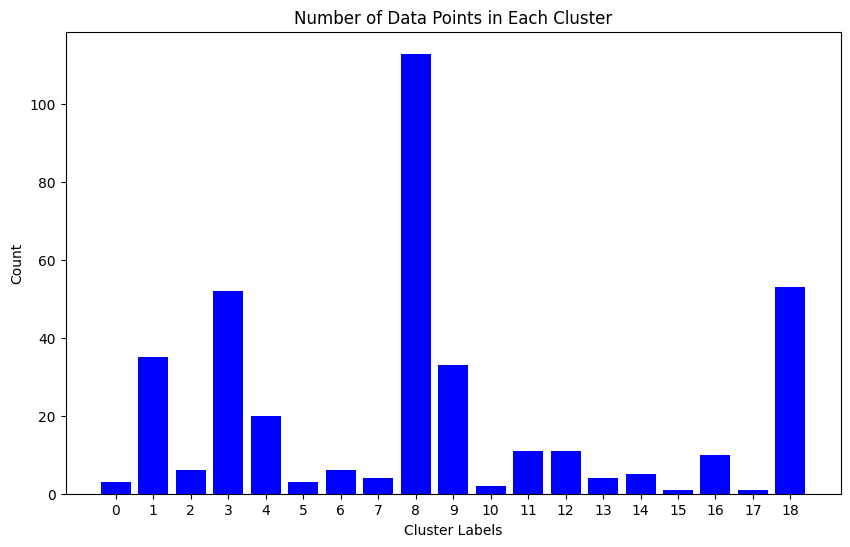

In [ ]:
# Count the number of data points in each cluster
cluster_counts = df['cluster_label'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(cluster_counts.index, cluster_counts.values, color='b')

plt.xlabel('Cluster Labels')
plt.ylabel('Count')
plt.title('Number of Data Points in Each Cluster')
plt.xticks(cluster_counts.index)
plt.show()

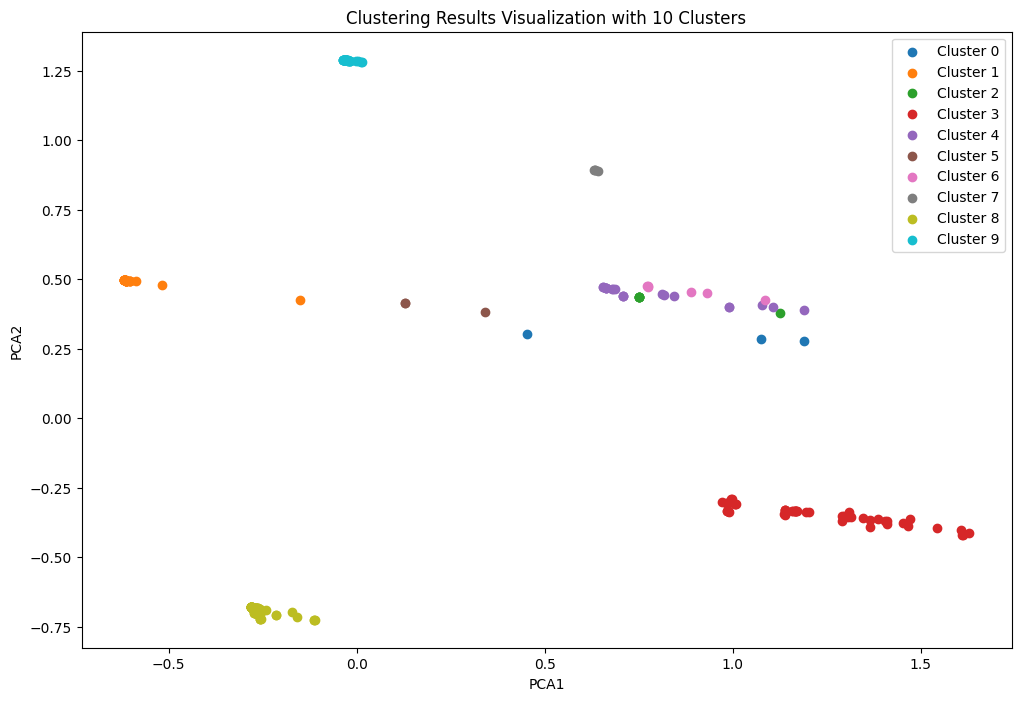

In [ ]:
# Perform PCA
features = pipeline.named_steps['preprocessor'].transform(df)
pca = PCA(n_components=2)
pca_result = pca.fit_transform(features)

# Create a DataFrame with PCA results and cluster labels
pca_df = pd.DataFrame(data=pca_result, columns=['PCA1', 'PCA2'])
pca_df['cluster_label'] = labels

# Plotting the PCA results with cluster labels
plt.figure(figsize=(12, 8))
plt.title('Clustering Results Visualization with 10 Clusters')

# Plot each cluster with a different color
for cluster in range(10):
    cluster_data = pca_df[pca_df['cluster_label'] == cluster]
    plt.scatter(cluster_data['PCA1'], cluster_data['PCA2'], label=f'Cluster {cluster}')

plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
plt.show()

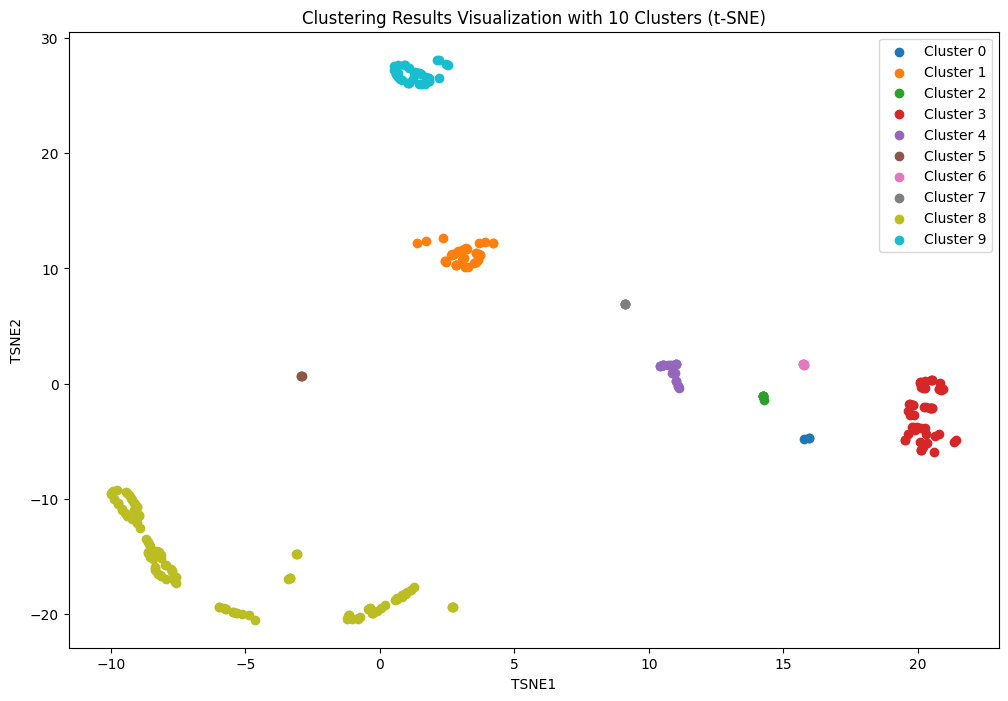

In [ ]:
# Perform t-SNE to reduce dimensions to 2D for visualization
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(features)

# Create a DataFrame with t-SNE results and cluster labels
tsne_df = pd.DataFrame(data=tsne_result, columns=['TSNE1', 'TSNE2'])
tsne_df['cluster_label'] = labels
# Plotting the t-SNE results with cluster labels
plt.figure(figsize=(12, 8))
plt.title('Clustering Results Visualization with 10 Clusters (t-SNE)')

# Plot each cluster with a different color
for cluster in range(10):
    cluster_data = tsne_df[tsne_df['cluster_label'] == cluster]
    plt.scatter(cluster_data['TSNE1'], cluster_data['TSNE2'], label=f'Cluster {cluster}')

plt.xlabel('TSNE1')
plt.ylabel('TSNE2')
plt.legend()
plt.show()

In [ ]:
df

# Get a Recommendation

## Euclidean Distance

In [ ]:
import numpy as np
from scipy.spatial import distance
import pandas as pd

def get_recommendations(unit_id, num_recs=5):
    # Check if the unit_id exists
    if unit_id not in df['unit_id'].values:
        print(f'unit_id {unit_id} Not Found')
        return

    # Ambil dari cluster yg sama
    input_cluster_label = df.loc[df['unit_id'] == unit_id, 'cluster_label'].values[0]
    same_cluster_units = df[df['cluster_label'] == input_cluster_label]

    # Ensure the columns used for clustering are numeric
    num_cols = same_cluster_units.select_dtypes(include=np.number).columns

    # hitung jaral Euclidean distance
    distance_matrix = distance.cdist(same_cluster_units[num_cols], same_cluster_units[num_cols], metric='euclidean')
    input_unit_index = same_cluster_units.index[same_cluster_units['unit_id'] == unit_id].tolist()[0]
    input_unit_distances = distance_matrix[:, same_cluster_units.index.get_loc(input_unit_index)]

    # Sort the units by distance
    sorted_units = same_cluster_units.iloc[np.argsort(input_unit_distances)]

    return sorted_units.iloc[1:num_recs+1]

unit_id = input('masukan unit_id: ')
recommendations = get_recommendations(unit_id, num_recs=5)
if recommendations is not None:
    print(recommendations.to_string(index=False))


## Cityblock / Manhattan Distance

In [ ]:
def get_recommendations(unit_id, num_recs=5):
    # Check if the unit_id exists
    if unit_id not in df['unit_id'].values:
        print(f'unit_id {unit_id} Not Found')
        return

    # Ambil dari cluster yg sama
    input_cluster_label = df.loc[df['unit_id'] == unit_id, 'cluster_label'].values[0]
    same_cluster_units = df[df['cluster_label'] == input_cluster_label]

    # Ensure the columns used for clustering are numeric
    num_cols = same_cluster_units.select_dtypes(include=np.number).columns

    # Hitung jarak Cityblock / Manhattan distance
    distance_matrix = distance.cdist(same_cluster_units[num_cols], same_cluster_units[num_cols], metric='cityblock')
    input_unit_index = same_cluster_units.index[same_cluster_units['unit_id'] == unit_id].tolist()[0]
    input_unit_distances = distance_matrix[:, same_cluster_units.index.get_loc(input_unit_index)]

    # Sort the units by distance
    sorted_units = same_cluster_units.iloc[np.argsort(input_unit_distances)]
    return sorted_units.iloc[1:num_recs+1]

unit_id = input('masukan unit_id: ')
recommendations = get_recommendations(unit_id, num_recs=5)
if recommendations is not None:
    print(recommendations.to_string(index=False))

## Cosine

In [ ]:
def get_recommendations(unit_id, num_recs=5):
    # Check if the unit_id exists
    if unit_id not in df['unit_id'].values:
        print(f'unit_id {unit_id} Not Found')
        return

    # Ambil dari cluster yang sama
    input_cluster_label = df.loc[df['unit_id'] == unit_id, 'cluster_label'].values[0]
    same_cluster_units = df[df['cluster_label'] == input_cluster_label]

    # Ensure the columns used for clustering are numeric
    num_cols = same_cluster_units.select_dtypes(include=np.number).columns

    # Hitung jarak Cosine Similarity
    distance_matrix = distance.cdist(same_cluster_units[num_cols], same_cluster_units[num_cols], metric='cosine')
    input_unit_index = same_cluster_units.index[same_cluster_units['unit_id'] == unit_id].tolist()[0]
    input_unit_distances = distance_matrix[:, same_cluster_units.index.get_loc(input_unit_index)]

    # Sort the units by distance
    sorted_units = same_cluster_units.iloc[np.argsort(input_unit_distances)]

    return sorted_units.iloc[1:num_recs+1]

unit_id = input('masukan unit_id: ')
recommendations = get_recommendations(unit_id, num_recs=5)
if recommendations is not None:
    print(recommendations.to_string(index=False))